In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
edges=[]
nnodes_cycle=7
for i in range(1,nnodes_cycle+1):
    if i%nnodes_cycle!=0:
        i2=i+1
        #print(i)
    else:
        i2=i-nnodes_cycle+1
    edges.append([i,"a%d"%i,i2])
    i_=i+nnodes_cycle
    i2_=i2+nnodes_cycle
    edges.append([i_,"alpha%d"%i,i2_])
    edges.append([i,"kb%d-x"%i,i_])
    edges.append([i_,"ku%d"%i,i])
print(edges)

[[1, 'a1', 2], [8, 'alpha1', 9], [1, 'kb1-x', 8], [8, 'ku1', 1], [2, 'a2', 3], [9, 'alpha2', 10], [2, 'kb2-x', 9], [9, 'ku2', 2], [3, 'a3', 4], [10, 'alpha3', 11], [3, 'kb3-x', 10], [10, 'ku3', 3], [4, 'a4', 5], [11, 'alpha4', 12], [4, 'kb4-x', 11], [11, 'ku4', 4], [5, 'a5', 6], [12, 'alpha5', 13], [5, 'kb5-x', 12], [12, 'ku5', 5], [6, 'a6', 7], [13, 'alpha6', 14], [6, 'kb6-x', 13], [13, 'ku6', 6], [7, 'a7', 1], [14, 'alpha7', 8], [7, 'kb7-x', 14], [14, 'ku7', 7]]


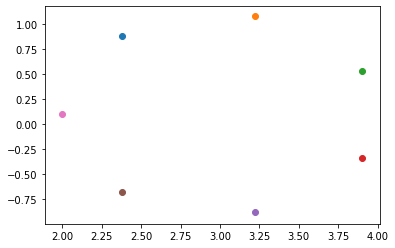

In [6]:
nodes=nnodes_cycle
dx=3
dy=0.1
coords=dict()
angle=(np.pi*2/nodes)
for i in range(nodes):
    theta=i*angle+angle
    x=-np.cos(theta)
    y=np.sin(theta)
    plt.scatter(x+dx,y+dy)
    coords[i+1]=(x,y)
    coords[i+nodes+1]=(x+dx,y+dy)
    

In [28]:
G=nx.DiGraph()
edges_cycle=[]
ebinding=[]
eunbinding=[]
edge_labels_cycle=dict()
edge_labels_b=dict()
edge_color=[]
for edge in edges:
    n0=int(edge[0])
    n1=int(edge[2])
    par=edge[1]
    
    if ((n1-n0)%nnodes_cycle-1!=0) and (n1-n0)!=1:
        if n0<n1:
            name=r"$k_{b,%s}x$"%n0
            ebinding.append((n0,n1))
        else:
            eunbinding.append((n0,n1))
            name=r"$k_{u,%s}$"%n1
        edge_labels_b[(n0,n1)]=name
    else:
        print("edge in cycle",n0,n1)
        edges_cycle.append((n0,n1))
        if n0<=nnodes_cycle:
            if n0<nnodes_cycle-1:
                name=r"$c_%s$"%(n0)
            elif n0==(nnodes_cycle-1):
                name=r"$c_{n-1}$"
            else:
                name=r"$c_n$"
        else:
            if n0==(2*nnodes_cycle-1):
                name=r"$\epsilon_{n-1}\,c_{n-1}$"
            elif n0==2*nnodes_cycle:
                name=r"$\epsilon_n\,c_n$"
            else:
                name=r"$\epsilon_{%s}c_{%s}$"%(n0-nnodes_cycle,n0-nnodes_cycle)
        edge_labels_cycle[(n0,n1)]=name
        if n0==nnodes_cycle or n0==2*nnodes_cycle:
            edge_color.append("r")
        else:
            print(n0,nnodes_cycle)
            edge_color.append("k")
    G.add_edge(n0,n1,name=name)
    
        

edge in cycle 1 2
1 7
edge in cycle 8 9
8 7
edge in cycle 2 3
2 7
edge in cycle 9 10
9 7
edge in cycle 3 4
3 7
edge in cycle 10 11
10 7
edge in cycle 4 5
4 7
edge in cycle 11 12
11 7
edge in cycle 5 6
5 7
edge in cycle 12 13
12 7
edge in cycle 6 7
6 7
edge in cycle 13 14
13 7
edge in cycle 7 1
edge in cycle 14 8


In [19]:
G.nodes

NodeView((1, 2, 8, 9, 3, 10, 4, 11, 5, 12, 6, 13, 7, 14))

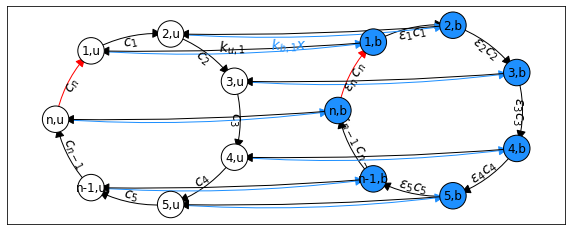

In [35]:
fig,ax=plt.subplots(1,1,figsize=(10,4))
connectstyle_cycle='arc3,rad=-0.15'
connectstyle_binding='arc3,rad=0.05'
connectstyle_unbinding='arc3,rad=-0.025'
#nx.draw(G,pos=coords,ax=ax,)
dict_labels=dict()
for i in range(1,nnodes_cycle+1):
    if i<nnodes_cycle-1:
        dict_labels[i]="%d,u"%(i)
        dict_labels[nnodes_cycle+i]="%d,b"%(i)
    elif i==nnodes_cycle-1:
        dict_labels[i]="n-1,u"
        dict_labels[nnodes_cycle+i]="n-1,b"
    else:
        dict_labels[i]="n,u"
        dict_labels[nnodes_cycle+i]="n,b"
        
    
   
colors=[]
for node in G.nodes:
    if node<=nnodes_cycle:
        colors.append("white")
    else:
        colors.append("dodgerblue")
nx.draw_networkx_nodes(G,pos=coords,node_color=colors,edgecolors="k",node_size=700)

nx.draw_networkx_edges(G,edgelist=edges_cycle,pos=coords,edge_color=edge_color,connectionstyle=connectstyle_cycle,arrowsize=20)
#nx.draw_networkx_edges(G,edgelist=[(nnodes_cycle,1),(2*nnodes_cycle,nnodes_cycle+1)],pos=coords,edge_color=,connectionstyle=connectstyle_cycle)

nx.draw_networkx_edges(G,edgelist=ebinding,pos=coords,edge_color="dodgerblue",connectionstyle=connectstyle_binding,arrowsize=20)
nx.draw_networkx_edges(G,edgelist=eunbinding,pos=coords,edge_color="k",connectionstyle=connectstyle_unbinding,arrowsize=20)
node_labels=G.nodes()

        
l=nx.draw_networkx_labels(G,pos=coords,labels=dict_labels)
le=nx.draw_networkx_edge_labels(G,pos=coords,edge_labels=edge_labels_cycle,font_size=14,label_pos=0.5,bbox=dict(alpha=0))
edge_labels_b_=dict()
edge_labels_u_=dict()
edge_labels_b_[(1,nnodes_cycle+1)]=edge_labels_b[(1,nnodes_cycle+1)]
edge_labels_u_[(nnodes_cycle+1,1)]=edge_labels_b[(nnodes_cycle+1,1)]
le=nx.draw_networkx_edge_labels(G,pos=coords,edge_labels=edge_labels_b_,font_color="dodgerblue",font_size=14,label_pos=0.3,bbox=dict(alpha=0))
le=nx.draw_networkx_edge_labels(G,pos=coords,edge_labels=edge_labels_u_,font_color="k",font_size=14,label_pos=0.5,bbox=dict(alpha=0))
plt.savefig("../../../presentations/drawings/Pcycle_n7.svg")

In [186]:
edge_labels_b[(1,8),(8,1)]

KeyError: ((1, 8), (8, 1))

In [120]:
G.edges()

OutEdgeView([(1, 2), (1, 8), (2, 3), (2, 9), (8, 9), (8, 1), (9, 10), (9, 2), (3, 4), (3, 10), (10, 11), (10, 3), (4, 5), (4, 11), (11, 12), (11, 4), (5, 6), (5, 12), (12, 13), (12, 5), (6, 7), (6, 13), (13, 14), (13, 6), (7, 1), (7, 14), (14, 8), (14, 7)])